In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("HTRU_2.csv")

In [4]:
data.columns = ['Mean IP', 'Standard deviation IP', 'Excess kurtosis IP', 'Skewness IP',
                'Mean DS', 'Standard deviation DS', 'Excess kurtosis DS', 'Skewness DS',
                'Class']
# IP - integrated profile
# DS - DM-SNR curve

In [5]:
data.shape
# 17 soma instanci, devet kolona

(17897, 9)

In [6]:
data.info()
# od kolona imamo osam merenih podataka zapisanih u pokretnom zarezu
# prve cetiri opisuju zabelezeni signal
# druge cetiri opisuju nesto o razmeri jacine signala i suma
# i jednu kategoricku kolonu sa vrednostima 0 - nije pulsar i 1 - jeste pulsar
# TODO jos nesto o znacenju brojeva u prvih osam kolona

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mean IP                17897 non-null  float64
 1   Standard deviation IP  17897 non-null  float64
 2   Excess kurtosis IP     17897 non-null  float64
 3   Skewness IP            17897 non-null  float64
 4   Mean DS                17897 non-null  float64
 5   Standard deviation DS  17897 non-null  float64
 6   Excess kurtosis DS     17897 non-null  float64
 7   Skewness DS            17897 non-null  float64
 8   Class                  17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [7]:
data.describe()
# prosek klase je 0.09... => imamo mnogo vise negativnih merenja
# preciznije, oko 9% atributa pripada pozitivnoj klasi

,Mean IP,Standard deviation IP,Excess kurtosis IP,Skewness IP,Mean DS,Standard deviation DS,Excess kurtosis DS,Skewness DS,Class
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.00000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419,0.09158
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270,0.28844
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.00000
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119,0.00000
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996,0.00000
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905,0.00000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.00000


In [8]:
dataPositive = data[data['Class'] == 1]
dataNegative = data[data['Class'] == 0]

<BarContainer object of 2 artists>

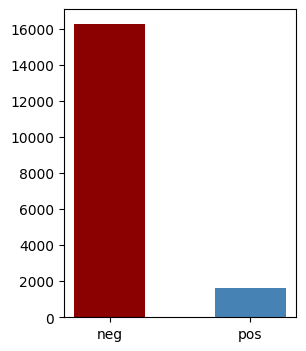

In [9]:
plt.figure(figsize = (3, 4))
plt.bar(['neg','pos'],[dataNegative.shape[0], dataPositive.shape[0]], width = 0.5, color = ['DarkRed', 'SteelBlue'])

In [10]:
data.head()

,Mean IP,Standard deviation IP,Excess kurtosis IP,Skewness IP,Mean DS,Standard deviation DS,Excess kurtosis DS,Skewness DS,Class
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [11]:
data.isna().sum()
# nema nedostajucih vrednosti pa nema potrebe da uopste razmisljamo kako bismo se njima bavili
# (izbacivanjem ili dopunom nekim vrednostima)

Mean IP                  0
Standard deviation IP    0
Excess kurtosis IP       0
Skewness IP              0
Mean DS                  0
Standard deviation DS    0
Excess kurtosis DS       0
Skewness DS              0
Class                    0
dtype: int64

In [12]:
# za svaki slucaj proveravam ima li sumnjivih vrednosti koje bi ukazale na
# nekonvencionalni metod zapisivanja nedostajucih vrednosti
brojNula = {}
for key in data.keys():
    brojNula[key] = (data[key] == 0).sum()
    
brojNula

{'Mean IP': 0,
 'Standard deviation IP': 0,
 'Excess kurtosis IP': 0,
 'Skewness IP': 0,
 'Mean DS': 0,
 'Standard deviation DS': 0,
 'Excess kurtosis DS': 0,
 'Skewness DS': 0,
 'Class': 16258}

In [13]:
correlation = data.corr()
correlation

,Mean IP,Standard deviation IP,Excess kurtosis IP,Skewness IP,Mean DS,Standard deviation DS,Excess kurtosis DS,Skewness DS,Class
Mean IP,1.000000,0.547099,-0.873899,-0.738780,-0.298832,-0.307005,0.234345,0.144057,-0.673187
Standard deviation IP,0.547099,1.000000,-0.521418,-0.539792,0.006893,-0.047606,0.029436,0.027714,-0.363704
Excess kurtosis IP,-0.873899,-0.521418,1.000000,0.945730,0.414362,0.432873,-0.341216,-0.214505,0.791592
Skewness IP,-0.738780,-0.539792,0.945730,1.000000,0.412052,0.415135,-0.328846,-0.204790,0.709526
Mean DS,-0.298832,0.006893,0.414362,0.412052,1.000000,0.796554,-0.615974,-0.354276,0.400873
Standard deviation DS,-0.307005,-0.047606,0.432873,0.415135,0.796554,1.000000,-0.809791,-0.575809,0.491532
Excess kurtosis DS,0.234345,0.029436,-0.341216,-0.328846,-0.615974,-0.809791,1.000000,0.923744,-0.390819
Skewness DS,0.144057,0.027714,-0.214505,-0.204790,-0.354276,-0.575809,0.923744,1.000000,-0.259123
Class,-0.673187,-0.363704,0.791592,0.709526,0.400873,0.491532,-0.390819,-0.259123,1.000000


<Axes: >

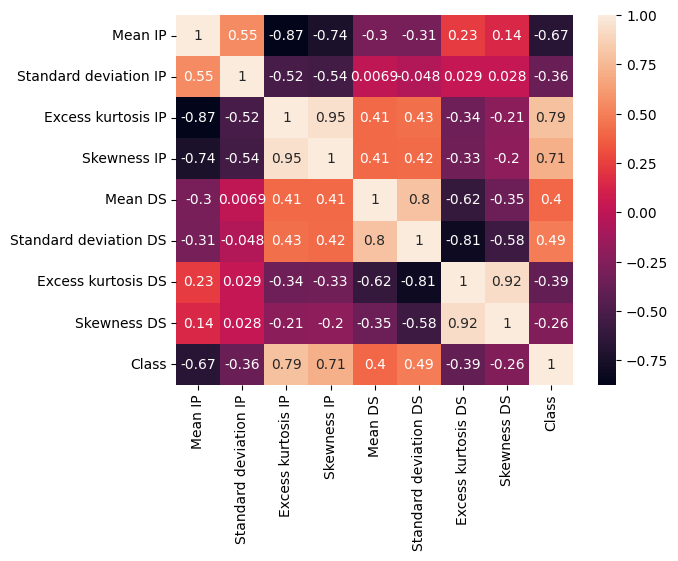

In [14]:
sb.heatmap(correlation, annot=True)
# ovde uvidjamo interesantne sablone korelacije i antikorelacije, vec mozemo pretpostaviti
# koje kolone ce vise uticati na klasifikaciju a koje manje
# TODO saznaj vise o prirodi podataka - sto prave ove 2x2 kvadrate

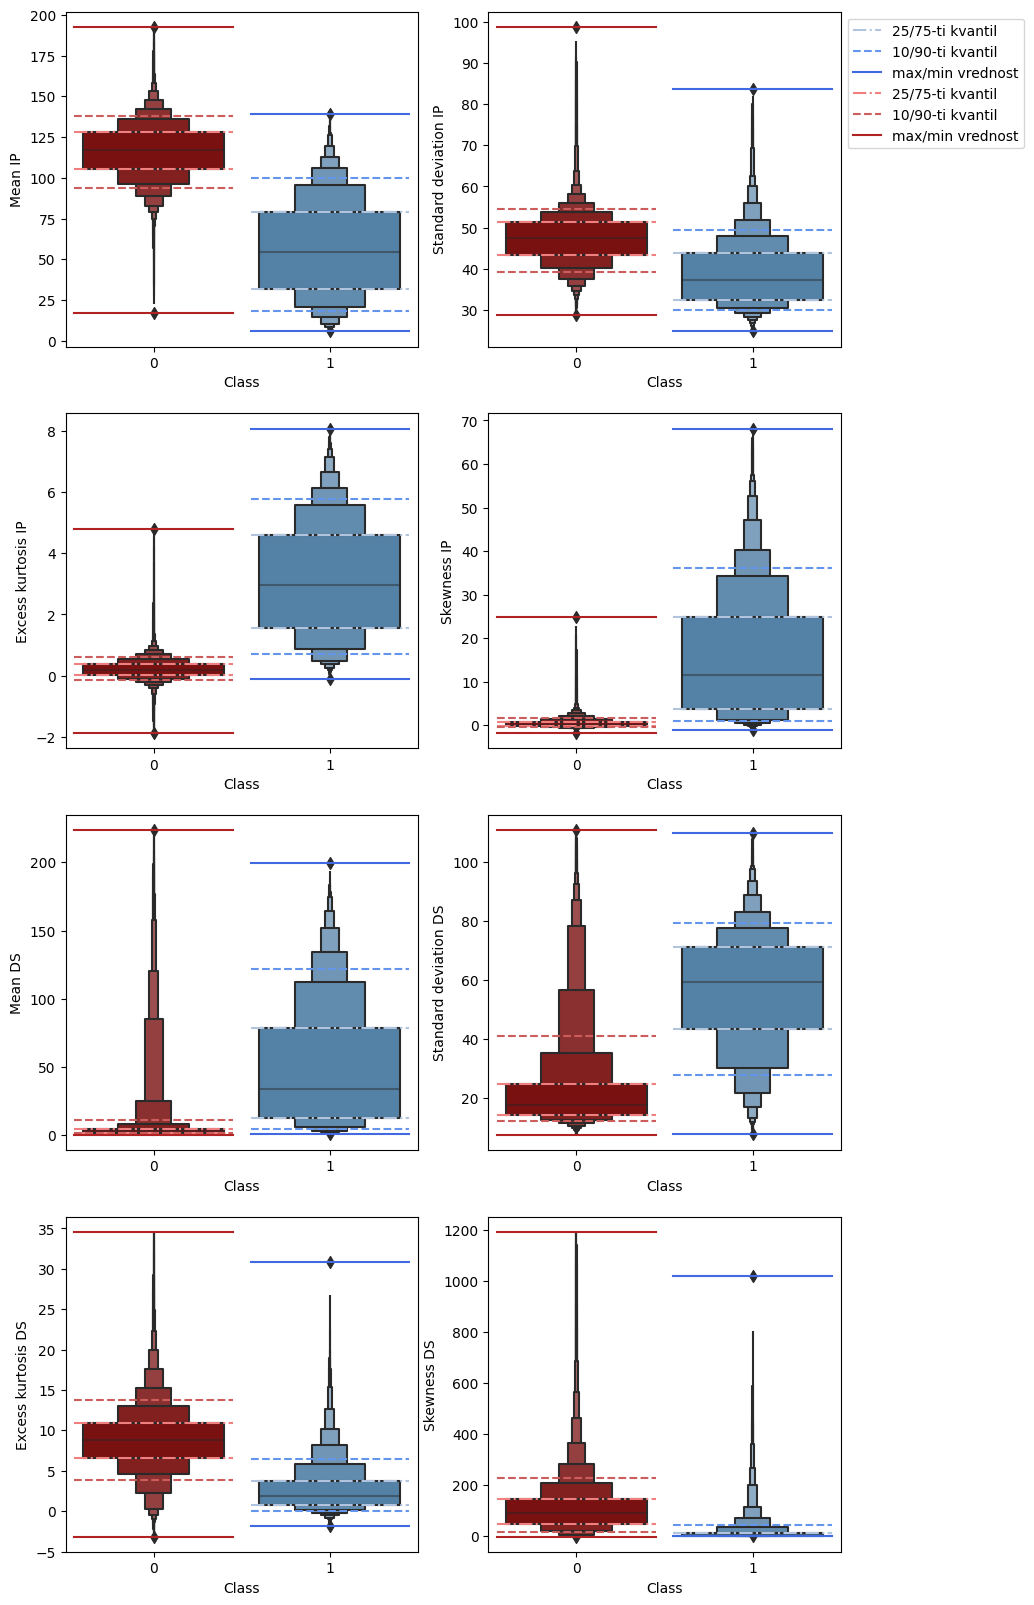

In [15]:
j = 1
plt.figure(figsize = (10, 20))
for key in data.keys():
    if key != 'Class':
        plt.subplot(4, 2, j)
        sb.boxenplot(x = data['Class'], y = data[key], palette = ['DarkRed', 'SteelBlue'], k_depth = 'full')
        plt.axhline(dataPositive[key].quantile(q = 0.75), xmin = 0.525, xmax = 0.975, color = 'LightSteelBlue', linestyle = '-.', label = '25/75-ti kvantil')
        plt.axhline(dataPositive[key].quantile(q = 0.25), xmin = 0.525, xmax = 0.975, color = 'LightSteelBlue', linestyle = '-.')
        plt.axhline(dataPositive[key].quantile(q = 0.90), xmin = 0.525, xmax = 0.975, color = 'CornFlowerBlue', linestyle = '--', label = '10/90-ti kvantil')
        plt.axhline(dataPositive[key].quantile(q = 0.10), xmin = 0.525, xmax = 0.975, color = 'CornFlowerBlue', linestyle = '--')
        plt.axhline(dataPositive[key].max(), xmin = 0.525, xmax = 0.975, color = 'RoyalBlue', label = 'max/min vrednost')
        plt.axhline(dataPositive[key].min(), xmin = 0.525, xmax = 0.975, color = 'RoyalBlue')
        plt.axhline(dataNegative[key].quantile(q = 0.75), xmin = 0.025, xmax=0.475, color = 'LightCoral', linestyle = '-.', label = '25/75-ti kvantil')
        plt.axhline(dataNegative[key].quantile(q = 0.25), xmin = 0.025, xmax=0.475, color = 'LightCoral', linestyle = '-.')
        plt.axhline(dataNegative[key].quantile(q = 0.90), xmin = 0.025, xmax=0.475, color = 'IndianRed', linestyle = '--', label = '10/90-ti kvantil')
        plt.axhline(dataNegative[key].quantile(q = 0.10), xmin = 0.025, xmax=0.475, color = 'IndianRed', linestyle = '--')
        plt.axhline(dataNegative[key].max(), xmin = 0.025, xmax=0.475, color = 'FireBrick', label = 'max/min vrednost')
        plt.axhline(dataNegative[key].min(), xmin = 0.025, xmax=0.475, color = 'FireBrick')
        if j == 2:
            plt.legend(bbox_to_anchor = (1, 1))
        j = j + 1
        
# medijanu i kvantile svih podataka zajedno ne crtamo jer znamo da kako klase 1 ima manje od 1% te granice se
# nece mnogo razlikovati od granica klase 0

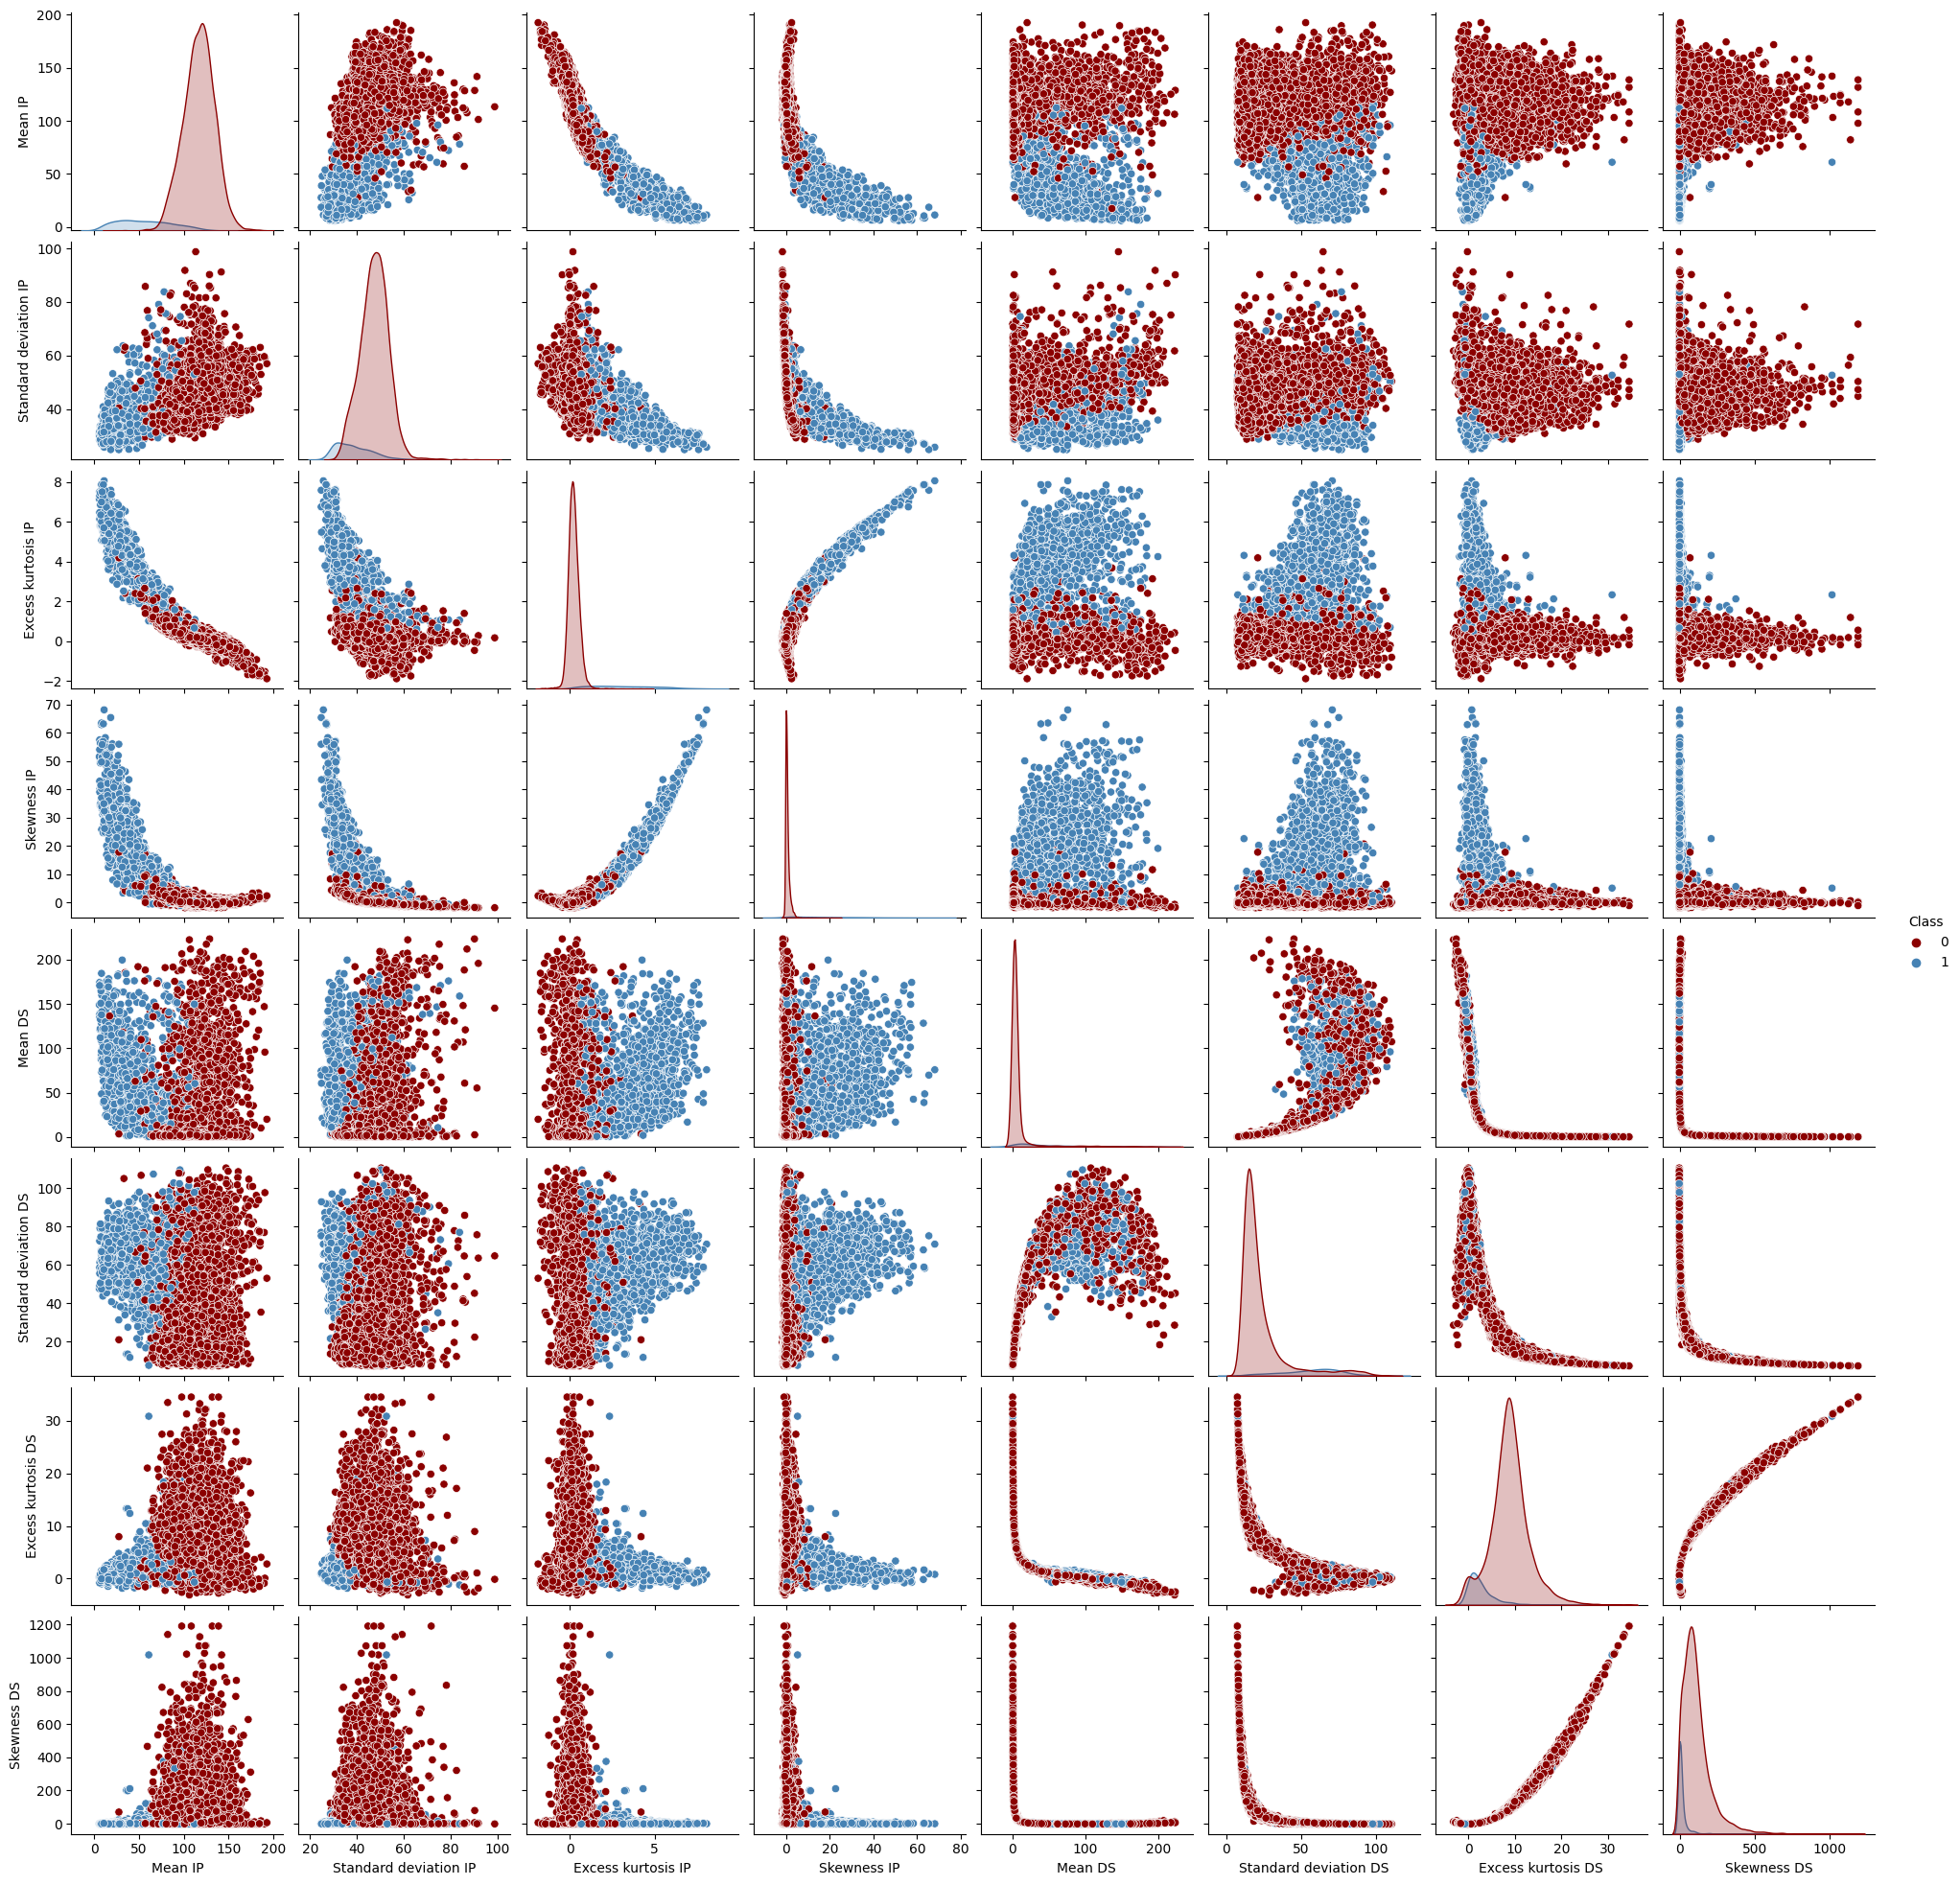

In [16]:
sb.pairplot(data, hue = 'Class', palette = ['DarkRed', 'SteelBlue'])
# uvidjamo relativno lepu izdvojenost klasa po zavisnosti dve promenjive pa mozemo ocekivati da nam model bude okej

In [17]:
# u sustini od pretprocesiranja nije bilo potrebno nista specijalno uraditi, mozemo preci na modele